In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
img = cv2.imread('../images/not_bleachable/not_bleachable.png')

In [3]:
save_path = '../images/not_bleachable/'

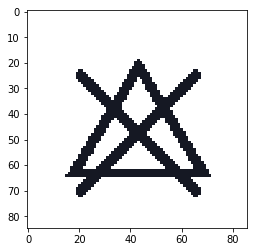

In [4]:
plt.imshow(img)

In [5]:
def addSaltPepperNoise(src,amount):
    row,col,ch = src.shape
    s_vs_p = 0.5
#    amount = 0.04
    out = src.copy()
    # Salt mode
    num_salt = np.ceil(amount * src.size * s_vs_p)
    coords = [np.random.randint(0, i-1 , int(num_salt))
                 for i in src.shape]
    out[coords[:-1]] = (255,255,255)

    # Pepper mode
    num_pepper = np.ceil(amount* src.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i-1 , int(num_pepper))
             for i in src.shape]
    out[coords[:-1]] = (0,0,0)
    return out

In [6]:
for index in range(1, 5):
    # ガンマ値を指定
    gamma = index

    # 色対応表を定義
    look_up_table = np.zeros((256, 1), dtype='uint8')
    # すべての対応表を事前に計算しておく
    for i in range(256):
        look_up_table[i][0] = 255 * pow(float(i) / 255, 1.0 / gamma)
    img_gamma = cv2.LUT(img, look_up_table)
    img = cv2.cvtColor(img_gamma, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f'{save_path}usui_{str(gamma)}.png', img)
    for i in range(20):
        amount = i * 0.002
        noise_salt = addSaltPepperNoise(img, amount)
        save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_noise{str(i)}.png', save_img)

        # 表示する画像のサイズ(変換前と同じサイズに指定)
    size = (img.shape[0], img.shape[1])
    # 回転の中心位置を表す座標（画像の中心に指定）
    center = (int(size[0]/2), int(size[1]/2))

    
    # 拡大･縮小の比率
    scale = 1.0
    
    for i in range(1, 30):
        # 回転角度
        angle = i

        # 回転変換を表す行列をつくる
        # (中心位置, 回転角度, 拡大･縮小の比率)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        # 回転変換を行う
        # (画像, 回転行列, 変換後の画像サイズ)
        rotated = cv2.warpAffine(img, rotation_matrix, size,borderValue=(255, 255, 255))

        save_img = cv2.cvtColor(rotated, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_rotate_{str(angle)}.png', save_img)
        
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_rotate_{str(angle)}_noise{str(j)}.png', save_img)
        
    for i in range(330, 360):
        # 回転角度
        angle = i

        # 回転変換を表す行列をつくる
        # (中心位置, 回転角度, 拡大･縮小の比率)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        # 回転変換を行う
        # (画像, 回転行列, 変換後の画像サイズ)
        rotated = cv2.warpAffine(img, rotation_matrix, size,borderValue=(255, 255, 255))

        save_img = cv2.cvtColor(rotated, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_rotate_{str(angle)}.png', save_img)
        
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_rotate_{str(angle)}_noise{str(j)}.png', save_img)
            
        # 変換後の画像のサイズを指定
    rows, cols, channnels = img.shape
    move = 6
    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,i],[0,1,0]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_right_{str(i)}.png', save_img)
        
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_right_{str(i)}_noise{str(j)}.png', save_img)

    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,-i],[0,1,0]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_left_{str(i)}.png', save_img)

        
                
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_left_{str(i)}_noise{str(j)}.png', save_img)
            
            
    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,0],[0,1,i]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_down_{str(i)}.png', save_img)
        
        
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_down_{str(i)}_noise{str(j)}.png', save_img)
            
    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,0],[0,1,-i]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_up_{str(i)}.png', save_img)
        
                
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_up_{str(i)}_noise{str(j)}.png', save_img)
            
    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,-i],[0,1,-i]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_leftup_{str(i)}.png', save_img)

        
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_leftup_{str(i)}_noise{str(j)}.png', save_img)
            
    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,i],[0,1,-i]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_rightup_{str(i)}.png', save_img)
        
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_rightup_{str(i)}_noise{str(j)}.png', save_img)
            
    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,i],[0,1,i]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_rightdown_{str(i)}.png', save_img)
        
        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_rightdown_{str(i)}_noise{str(j)}.png', save_img)
            
    for i in range(1, move):
        # 変換行列
        M = np.float32([[1,0,-i],[0,1,i]])
        # 並進移動の実行
        moved = cv2.warpAffine(img, M, (cols, rows),borderValue=(255, 255, 255))


        save_img = cv2.cvtColor(moved, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'{save_path}usui_{str(gamma)}_leftdown_{str(i)}.png', save_img)

        for j in range(6):
            amount = j * 0.002
            noise_salt = addSaltPepperNoise(save_img, amount)
            save_img = cv2.cvtColor(noise_salt, cv2.COLOR_RGB2BGR)
            cv2.imwrite(f'{save_path}usui_{str(gamma)}_leftdown_{str(i)}_noise{str(j)}.png', save_img)



/home/ryuto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/home/ryuto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()
